# A more precise way to report wall time in timeit.timeit 
## Lightning talk on PyCon NA 2021 

In [1]:
import openturns as ot
from openturns.viewer import View
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image 

## Purpose of timeit.timeit:
### - get some elapsed real time (real time, wall-clock time, or wall time) 
### - measures times from start to end of a program
### - similar to a stopwatch 

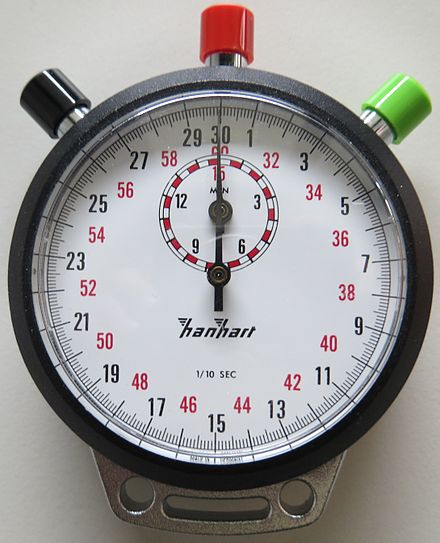

In [2]:
Image(filename='C:\\Users\\Jens Harbers\\Documents\\Stoppuhr_hanhart.jpg')

In [2]:
# print versions of used libraries
print("openturns",ot.__version__)
print("numpy",np.__version__)
print("pandas",pd.__version__)

openturns 1.15
numpy 1.21.6
pandas 1.0.3


# Demonstration of a small example in Jupyter Notebook
### 1. measure wall times in timeit.timeit

In [3]:
result = %timeit -o -n 1500 -r 200 np.random.random(2000)

12.7 µs ± 541 ns per loop (mean ± std. dev. of 200 runs, 1500 loops each)


##### implicit assumption here: timings are gaussian distributed (Normal Distribution)

$${\mathcal {N}}(\mu ,\sigma ^{2})$$

mean = $\mu$

standard deviation = $\sigma$

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

### 2. convert those into a numpy array in order to make it work with openturns
##### openturns expects a different array shape compared to numpy

In [4]:
sample = np.array(result.timings).reshape(len(result.timings),1)

Normal(mu = 1.27282e-05, sigma = 5.42758e-07)
-25.96734406136176


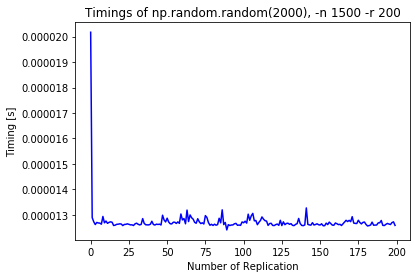

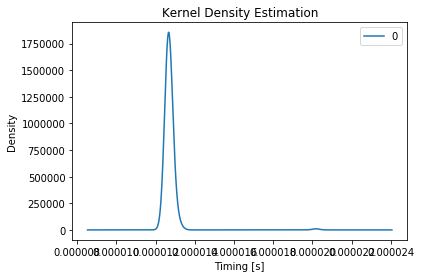

In [5]:
# estimate two moments from normal distribution assumption of the data
distribution = [ot.NormalFactory()]
best_model, best_bic = ot.FittingTest.BestModelBIC(sample, distribution)

print(best_model)

print(best_bic)

# matplotlib plot of Wall Times in respect of replication number
x = np.array(np.arange(len(sample)))
y = sample
plt.plot(x,y,'b-')
plt.title('Timings of np.random.random(2000), -n 1500 -r 200')
plt.ylabel("Timing [s]")
plt.xlabel("Number of Replication")
plt.show()

df = pd.DataFrame(sample)
df.plot.kde(title="Kernel Density Estimation")
plt.xlabel("Timing [s]")
plt.show()


In [22]:
tested_distributions = [ot.GammaFactory(),
                        ot.ChiFactory(),
                        ot.ChiSquareFactory(),
                        ot.FisherSnedecorFactory(),
                        ot.BernoulliFactory(), 
                        ot.NormalFactory(),
                        ot.GumbelFactory(),
                        ot.GumbelCopulaFactory(),
                        ot.LogUniformFactory(),
                        ot.MeixnerDistributionFactory(),
                        ot.TrapezoidalFactory(),
                        ot.LogisticFactory(),
                        ot.LogNormalFactory(),
                        ot.StudentFactory(),
                        ot.UniformFactory(),
                        ot.WeibullMinFactory(),
                        ot.WeibullMaxFactory(),
                        ot.WeibullFactory(),
                        ot.ExponentialFactory(),
                        ot.BetaFactory()]
# get all univariate Distributions. 
# Times are distributed continuously, with a minimum of 0

best_model, best_bic = ot.FittingTest.BestModelBIC(sample, tested_distributions)

print(best_model)
print(best_bic)

LogNormal(muLog = -15.0168, sigmaLog = 0.417135, gamma = 1.23761e-05)
-28.865032163112545
